In [106]:
import sys, traceback
import cv2 as cv
import os
import re
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv
import glob
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
pcv.params.debug = 'plot' 

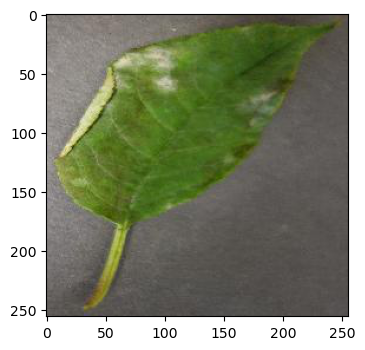

In [107]:
images = glob.glob('../resources/Plant_leave_diseases_dataset_without_augmentation/Cherry*/*')
img=images[40]
# img = "../resources/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (5).JPG"
img, path, filename = pcv.readimage(img)

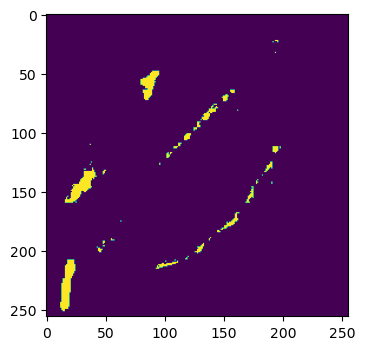

In [146]:
# img =  cv.imread('leaf.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# find the green color 
mask_green = cv.inRange(hsv, (100,140,0), (255,255,255))
# find the brown color
# mask_brown = cv.inRange(hsv, (8, 60, 20), (30, 255, 200))
# find the yellow color in the leaf
# mask_yellow = cv.inRange(hsv, (21, 39, 64), (40, 255, 255))

# find any of the three colors(green or brown or yellow) in the image
mask = cv.bitwise_or(mask_green, mask_brown)
mask = cv.bitwise_or(mask, mask_yellow)

# Bitwise-AND mask and original image
# mask = imfill(mask,'holes');

plt.imshow(mask)
res = cv.bitwise_and(img,img, mask= mask)

# plt.imshow(img)
# plt.imshow(res)


In [83]:
def mask_from_contours(ref_img, contours):
    mask = numpy.zeros(ref_img.shape, numpy.uint8)
    mask = cv2.drawContours(mask, contours, -1, (255,255,255), -1)
    return cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [84]:
def find_contours(img):
    kernel   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    morphed  = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    contours = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours[-2]

In [85]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

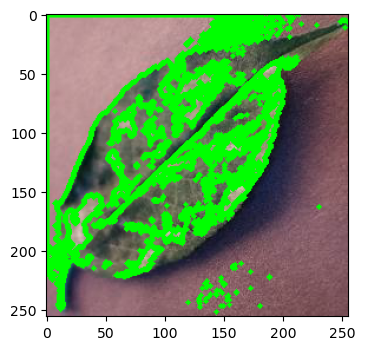

In [86]:
plt.imshow(cv.drawContours(img, contours, -1, (0,255,0), 3))
# [cnt.astype(int)]

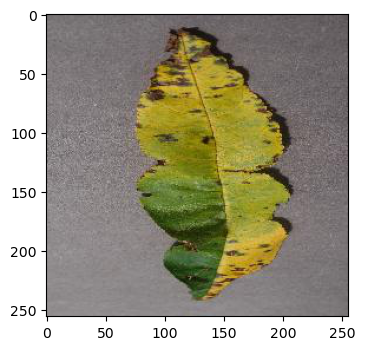

Contours in the image, 103


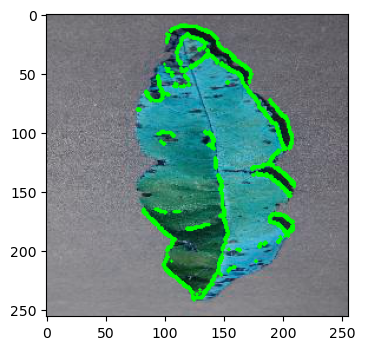

In [87]:
img = "../resources/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (4).JPG"
img, path, filename = pcv.readimage(img)
image = img

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(gray, (23, 23), 0)
cv.imshow("blurred", blurred)

canny = cv.Canny(blurred, 40, 40)
cnts, _ = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

print(f"Contours in the image, %d" % (len(cnts)))

cv.drawContours(image, cnts, -1, (0, 255, 0), 2)

cv.imwrite('{}.png'.format('sunflower'), image)

plt.imshow(image)

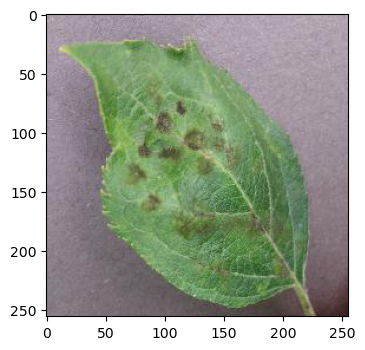

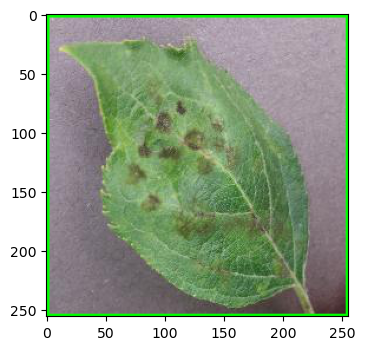

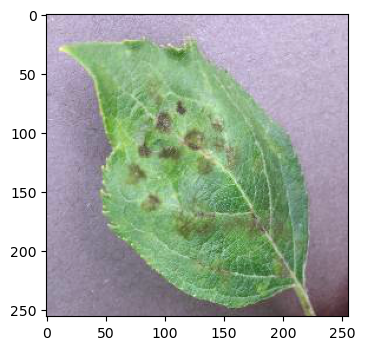

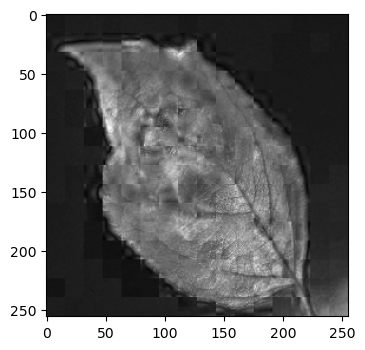

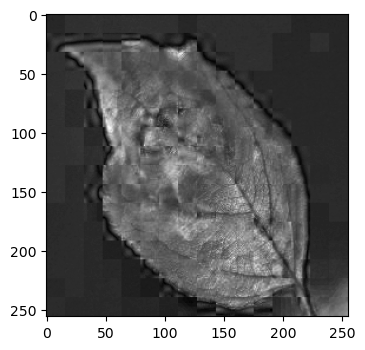

In [88]:
img = "../resources/Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (236).JPG"

img, path, filename = pcv.readimage(img)
cr = pcv.white_balance(img=img, mode='hist', roi=[0, 0, 256, 256])

s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
s = pcv.rgb2gray_hsv(rgb_img=cr, channel='s')


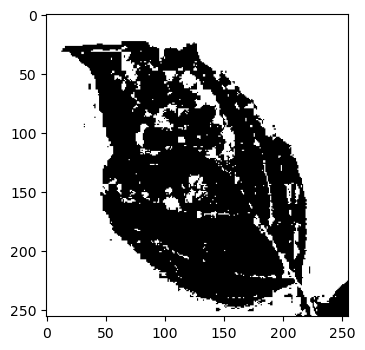

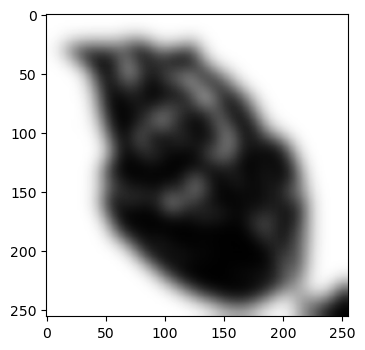

NameError: name 't' is not defined

In [89]:
tr = pcv.threshold.otsu(gray_img=s, max_value=255, object_type='dark')
# thresholded = pcv.threshold.triangle(gray_img=s, max_value=255, object_type='dark', xstep=1)

# labeled_imgs = pcv.visualize.auto_threshold_methods(gray_img=s, grid_img=True, object_type="light")

# f=pcv.fill_holes(bin_img=tr)
# pcv.closing(gray_img=f)
b_gi = pcv.gaussian_blur(img=tr, ksize=(51, 51), sigma_x=0, sigma_y=None)
fl = pcv.fill(bin_img=t, size=500)
gi = pcv.gaussian_blur(img=fl, ksize=(51, 51), sigma_x=0, sigma_y=None)
er_img = pcv.erode(gray_img=gi, ksize=5, i=1)
